In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [27]:
X, y = make_blobs(n_samples=50000, centers=[[2, 3], [-2, -1], [1.5, 0], [10, -2]], cluster_std=0.9)

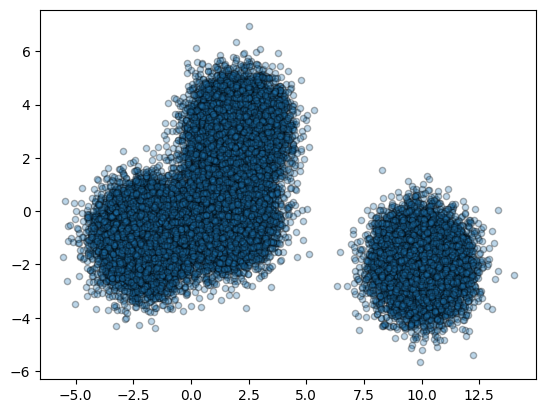

In [28]:
plt.scatter(X[:,0], X[:,1], marker='.', alpha=0.3, ec='k', s=80)

In [29]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [30]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 9.99114916, -2.00844294],
       [-2.02778755, -1.00519673],
       [ 2.02077122,  3.03415569],
       [ 1.50347366, -0.04526438]])

In [31]:
k_means_labels = k_means.labels_

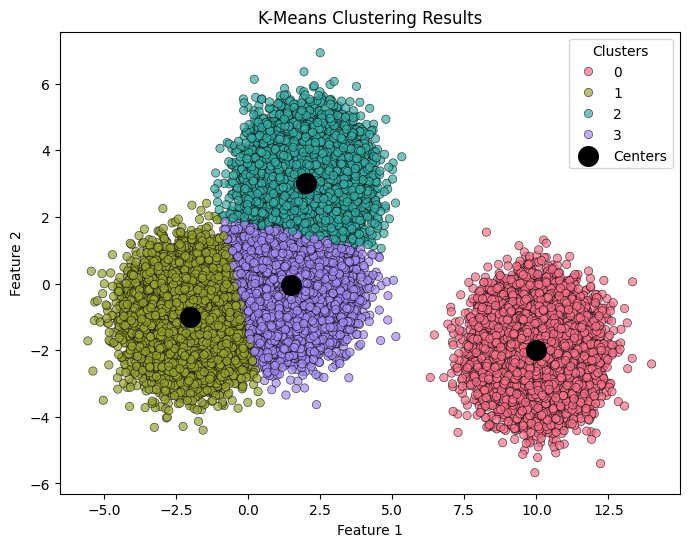

In [33]:
n_clusters = len(np.unique(k_means_labels))  # Number of clusters

# Define a color palette with enough distinct colors
palette = sns.color_palette("husl", n_clusters)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=k_means_labels, palette=palette, alpha=0.7, edgecolor='k')

# Plot cluster centers with a unique color (red)
plt.scatter(k_means_cluster_centers[:, 0], k_means_cluster_centers[:, 1], c='black', marker='o', s=200, label='Centers')

plt.legend(title="Clusters")
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [45]:
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score

silhouette_avg = silhouette_score(X, k_means_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")
interia = k_means.inertia_
print(f"Inertia: {interia:.4f}")
db_score = davies_bouldin_score(X, k_means_labels)
print(f"Davies Bouldin Score: {db_score:.4f}")


Silhouette Score: 0.5964
Inertia: 77480.9551
Davies Bouldin Score: 0.5650


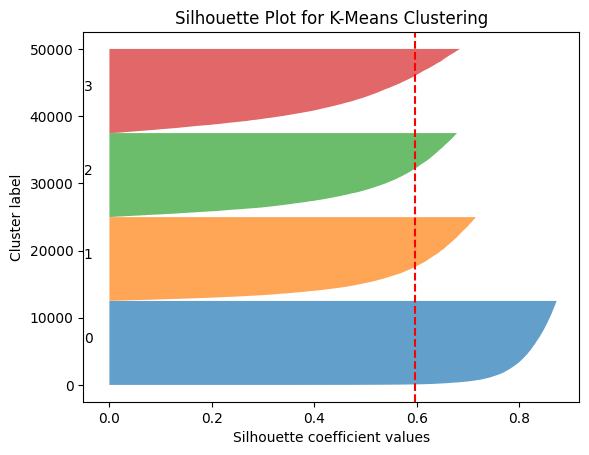

In [42]:
silhouette_values = silhouette_samples(X, k_means_labels)

n_clusters = 4
y_lower, y_upper = 0, 0
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_values[k_means_labels == i]
    cluster_silhouette_vals.sort()
    
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        cluster_silhouette_vals,
        alpha=0.7
    )
    
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper

plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title("Silhouette Plot for K-Means Clustering")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")  # Show average score
plt.show()

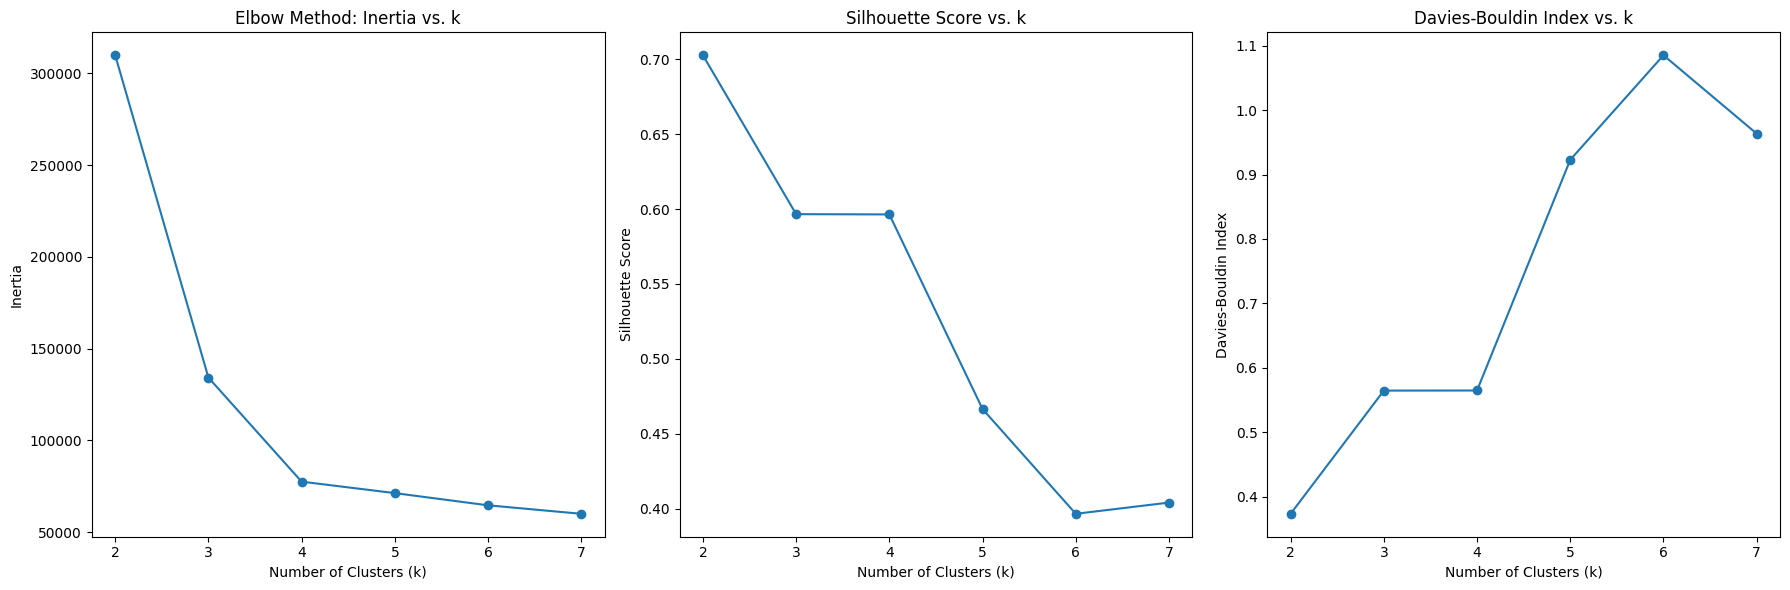

In [46]:
# Range of k values to test
k_values = range(2, 8)

# Store performance metrics
inertia_values = []
silhouette_scores = []
davies_bouldin_indices = []

for k in k_values:
    k_means = KMeans(n_clusters=k, random_state=42)
    y = k_means.fit_predict(X)
    
    # Calculate and store metrics
    inertia_values.append(k_means.inertia_)
    silhouette_scores.append(silhouette_score(X, y))
    davies_bouldin_indices.append(davies_bouldin_score(X, y))

# Plot the inertia values (Elbow Method)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method: Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot silhouette scores
plt.subplot(1, 3, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

# Plot Davies-Bouldin Index
plt.subplot(1, 3, 3)
plt.plot(k_values, davies_bouldin_indices, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')

plt.tight_layout()
plt.show()

In [14]:
# https://www.kaggle.com/datasets/ravalsmit/customer-segmentation-data
df = pd.read_csv('./../data/customer_segmentation_data.csv').drop(['Customer ID', 'Purchase History'], axis=1).drop(['Segmentation Group'], axis=1)

In [15]:
df.sample(5)

,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language
15948,64,Male,Separated,Bachelor's Degree,Punjab,Artist,103847,policy1,Email,policy5,108213,2761,Individual,In-Person Meeting,In-Person Meeting,Morning,German
20414,49,Female,Widowed,High School Diploma,Assam,Nurse,110894,policy1,Phone,policy1,575308,4421,Family,Text,Mail,Morning,Spanish
4570,37,Male,Widowed,High School Diploma,Mizoram,Nurse,109929,policy1,Chat,policy1,788323,3189,Individual,Email,Phone,Morning,English
22264,67,Male,Single,Associate Degree,Madhya Pradesh,Entrepreneur,70578,policy4,Chat,policy4,443745,4140,Family,Email,In-Person Meeting,Afternoon,German
53412,36,Female,Divorced,Associate Degree,Lakshadweep,Entrepreneur,50537,policy3,Chat,policy1,200561,2683,Group,Mail,In-Person Meeting,Morning,French


In [16]:
# one hot encoding for categorical features

categorical_features = df.select_dtypes(include=['object']).columns.to_list()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

In [17]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

encoder = OneHotEncoder()
encoded_cats = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_cats.toarray(), columns=encoder.get_feature_names_out())


In [18]:
df_preprocessed = pd.concat([df[numerical_features], encoded_df], axis=1)

In [19]:
df_preprocessed

,Age,Income Level,Coverage Amount,Premium Amount,Gender_Female,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,...,Preferred Contact Time_Afternoon,Preferred Contact Time_Anytime,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Preferred Contact Time_Weekends,Preferred Language_English,Preferred Language_French,Preferred Language_German,Preferred Language_Mandarin,Preferred Language_Spanish
0,23,70541,366603,2749,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,26,54168,780236,1966,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,29,73899,773926,4413,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,20,63381,787815,4342,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,25,38794,366506,1276,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,35,120850,586401,4404,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53499,61,122309,637733,1285,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53500,25,49258,631057,4407,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
53501,42,66301,730385,4482,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [20]:
X = df_preprocessed.values

In [21]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [22]:
n_clusters = 5
k_means = KMeans(init="k-means++", n_clusters=n_clusters, n_init=12)
k_means.fit(X_std)

KMeans(n_clusters=5, n_init=12)

In [23]:
labels = k_means.labels_
df_preprocessed["Cluster"] = labels

In [24]:
df_preprocessed.groupby('Cluster').mean()

,Age,Income Level,Coverage Amount,Premium Amount,Gender_Female,Gender_Male,Marital Status_Divorced,Marital Status_Married,Marital Status_Separated,Marital Status_Single,...,Preferred Contact Time_Afternoon,Preferred Contact Time_Anytime,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Preferred Contact Time_Weekends,Preferred Language_English,Preferred Language_French,Preferred Language_German,Preferred Language_Mandarin,Preferred Language_Spanish
Cluster,,,,,,,,,,,,,,,,,,,,,
0,43.708021,85601.125793,500818.928592,3009.858627,0.469273,0.530727,0.206145,0.267455,0.174120,0.179169,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.161137,0.277121,0.248413,0.165897,0.147432
1,44.909244,84129.676925,496974.503245,3057.462847,0.505260,0.494740,0.255707,0.234221,0.192144,0.154879,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.172672,0.264100,0.277641,0.147941,0.137645
2,44.083621,81166.124395,488845.804423,3063.020041,0.486524,0.513476,0.247408,0.229440,0.152730,0.200415,...,0.137526,0.116102,0.232205,0.277816,0.236351,0.222529,0.236351,0.245335,0.139599,0.156185
3,44.409423,81525.820272,489510.542551,3057.354552,1.000000,0.000000,0.257472,0.251198,0.161704,0.171173,...,0.000000,0.000000,0.238763,0.385067,0.376169,0.183550,0.232717,0.290554,0.148700,0.144479
4,43.685946,82355.585120,490590.174904,2978.001394,0.000000,1.000000,0.244693,0.243139,0.154428,0.175708,...,0.000000,0.000000,0.261900,0.354578,0.383523,0.181550,0.249732,0.257290,0.164934,0.146494
